In [1]:
%matplotlib inline
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')
import warnings
warnings.simplefilter('ignore')

In [2]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
print(X.shape, y.shape)

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

print(f"R^2 score = {r2_score(y_test, y_pred):.3f}")
print(f"RMSE = {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")

(506, 13) (506,)
R^2 score = 0.005
RMSE = 9.016


In [3]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

X, y = load_boston(return_X_y=True)

estimator = Pipeline([
    ('svr', SVR()),
])

param_grid = {
    'svr__kernel': ['rbf'],
    'svr__C': [100, 1000, 1e4],
    'svr__gamma': [1e-8, 1e-7, 1e-6],
}

grid = GridSearchCV(estimator, param_grid, 
                    scoring='r2',
                    n_jobs=-1,
                    cv=5,
                    iid=False)

grid.fit(X, y)

print(f"Best score: {grid.best_score_:.3f}")
print(f"Best parameters: {grid.best_params_}")
print(f"Avg. time to fit: {grid.cv_results_['mean_fit_time'].mean():.3f}")
print(f"Avg. time to predict: {grid.cv_results_['mean_score_time'].mean():.3f}")

Best score: 0.339
Best parameters: {'svr__C': 10000.0, 'svr__gamma': 1e-07, 'svr__kernel': 'rbf'}
Avg. time to fit: 0.014
Avg. time to predict: 0.002


In [4]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

X, y = load_boston(return_X_y=True)

estimator = Pipeline([
    ('svr', SVR()),
])

param_grid = {
    'svr__kernel': ['linear'],
    'svr__C': [0.1, 1, 10],
    'svr__gamma': [1e-8, 1e-7, 1e-6],
}

grid = GridSearchCV(estimator, param_grid, 
                    scoring='r2',
                    n_jobs=-1,
                    cv=5,
                    iid=False)

grid.fit(X, y)

print(f"Best score: {grid.best_score_:.3f}")
print(f"Best parameters: {grid.best_params_}")
print(f"Avg. time to fit: {grid.cv_results_['mean_fit_time'].mean():.3f}")
print(f"Avg. time to predict: {grid.cv_results_['mean_score_time'].mean():.3f}")

Best score: 0.501
Best parameters: {'svr__C': 0.1, 'svr__gamma': 1e-08, 'svr__kernel': 'linear'}
Avg. time to fit: 7.383
Avg. time to predict: 0.001


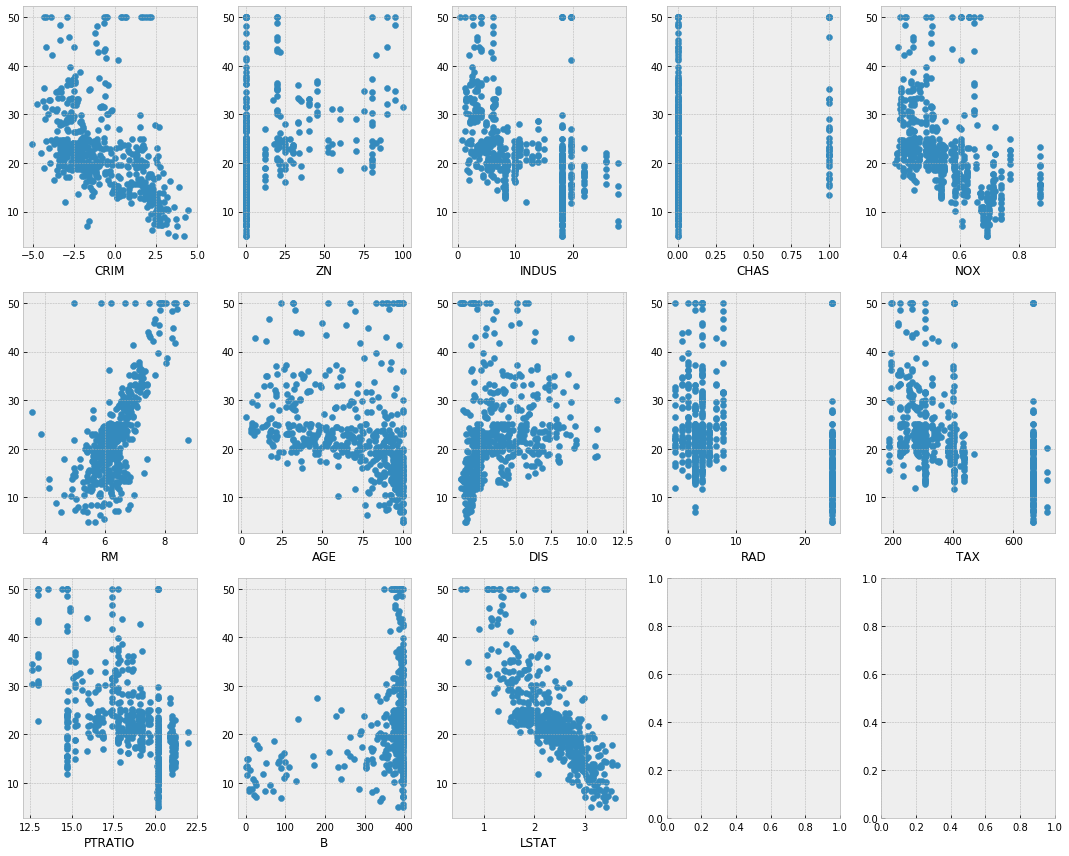

In [5]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)

df['CRIM'] = np.log(df['CRIM'])
df['LSTAT'] = np.log(df['LSTAT'])

fig, axes = plt.subplots(3, 5, figsize=(15, 12))
for ax, col in zip(axes.ravel(), df.columns):
    ax.scatter(df[col], y)
    ax.set_xlabel(col)
    
plt.tight_layout()

In [6]:
X = df.values
y = boston.target
X.shape, y.shape

((506, 13), (506,))

In [7]:
estimator = Pipeline([
    ('svr', SVR()),
])

param_grid = {
    'svr__kernel': ['linear'],
    'svr__C': [0.1, 1, 10],
    'svr__gamma': [1e-16, 1e-12, 1e-8],
}

grid = GridSearchCV(estimator, param_grid, 
                    scoring='r2',
                    n_jobs=-1,
                    cv=5,
                    iid=False)

grid.fit(X, y)

print(f"Best score: {grid.best_score_:.3f}")
print(f"Best parameters: {grid.best_params_}")
print(f"Avg. time to fit: {grid.cv_results_['mean_fit_time'].mean():.3f}")
print(f"Avg. time to predict: {grid.cv_results_['mean_score_time'].mean():.3f}")


Best score: 0.556
Best parameters: {'svr__C': 10, 'svr__gamma': 1e-16, 'svr__kernel': 'linear'}
Avg. time to fit: 10.551
Avg. time to predict: 0.001


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

estimator = Pipeline([
    ('sc', StandardScaler()),
    ('pca', PCA()),
    ('svr', SVR()),
])

param_grid = {
    'pca__n_components': [5, 6, 7],
    'svr__kernel': ['linear'],
    'svr__C': [0.1, 1, 10],
    'svr__gamma': [1e-16, 1e-12, 1e-8],
}

grid = GridSearchCV(estimator, param_grid, 
                    scoring='r2',
                    n_jobs=-1,
                    cv=5,
                    iid=False)

grid.fit(X, y)

print(f"Best score: {grid.best_score_:.3f}")
print(f"Best parameters: {grid.best_params_}")
print(f"Avg. time to fit: {grid.cv_results_['mean_fit_time'].mean():.3f}")
print(f"Avg. time to predict: {grid.cv_results_['mean_score_time'].mean():.3f}")

Best score: 0.584
Best parameters: {'pca__n_components': 6, 'svr__C': 1, 'svr__gamma': 1e-16, 'svr__kernel': 'linear'}
Avg. time to fit: 0.014
Avg. time to predict: 0.001
